# Transposable elements and genome size

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as sts

%matplotlib inline

## Loading in data

In [3]:
# Result of masking genomes with denovo + eukaryotic RepBase database
total = pd.read_csv("../ipython_data/total_repeats.dataframe", sep = "\t", index_col = False, na_values='na',
                       names = ["ALIAS", "NAME", "CLASS", "FAM", "CLASS_FAM", "FULL", 
                                "LENGTH", "FRG", "FULL_FRG", "NR_FRG", "AVG_DIV",
                                "MED_DIV", "AVG_DEL", "MED_DEL", "AVG_INS", "MED_INS",
                                "LEN_MASKED", "AVG_LEN_MASKED", "MED_LEN_MASKED", "GENOME_PERC",
                                "LEN_OVERLAP", "GENOME_PERC_OVERLAP", "LEN_MASKED_OVERLAP"])

In [8]:
total.columns

Index([u'ALIAS', u'NAME', u'CLASS', u'FAM', u'CLASS_FAM', u'FULL', u'LENGTH',
       u'FRG', u'FULL_FRG', u'NR_FRG', u'AVG_DIV', u'MED_DIV', u'AVG_DEL',
       u'MED_DEL', u'AVG_INS', u'MED_INS', u'LEN_MASKED', u'AVG_LEN_MASKED',
       u'MED_LEN_MASKED', u'GENOME_PERC', u'LEN_OVERLAP',
       u'GENOME_PERC_OVERLAP', u'LEN_MASKED_OVERLAP'],
      dtype='object')

In [9]:
annot = pd.read_csv("../ipython_data/names.tab", encoding = "UTF-8", sep = "\t",\
                    names = ["ALIAS", "ORDER", "SPECIES", "COMMON_NAME"])

In [5]:
stats = pd.read_csv("../ipython_data/N50.tab", sep = " ",\
                    names = ["ALIAS", "N50", "ASSEMBLY_SIZE", "A%", "G%", "C%", "T%"]).drop_duplicates()

In [6]:
annotstats = pd.merge(annot, stats) # Additional info combined
annotstats.head()

,ALIAS,ORDER,SPECIES,COMMON_NAME,N50,ASSEMBLY_SIZE,A%,G%,C%,T%
0,fish_1,Gadiformes,Arctogadus glacialis,Arctic cod,3702,428791846,27.75,22.25,22.27,27.73
1,fish_2,Gadiformes,Boreogadus saida,Polar cod,3572,412070465,27.66,22.38,22.38,27.58
2,fish_3,Gadiformes,Trisopterus minutus,Poor cod,3976,334717091,27.70,22.31,22.32,27.66
3,fish_4,Gadiformes,Pollachius virens,Saithe,4344,394927939,27.91,22.10,22.13,27.86
4,fish_5,Gadiformes,Melanogrammus aeglefinus,Haddoc,3697,374396471,27.77,22.27,22.27,27.69


In [10]:
# Creating dataframe
df = pd.merge(total, annotstats)
alias_74 = pd.read_table('../ipython_data/74aliases', names = ['ALIAS'])
df = pd.merge(alias_74, df)

In [12]:
df.columns

Index([u'ALIAS', u'NAME', u'CLASS', u'FAM', u'CLASS_FAM', u'FULL', u'LENGTH',
       u'FRG', u'FULL_FRG', u'NR_FRG', u'AVG_DIV', u'MED_DIV', u'AVG_DEL',
       u'MED_DEL', u'AVG_INS', u'MED_INS', u'LEN_MASKED', u'AVG_LEN_MASKED',
       u'MED_LEN_MASKED', u'GENOME_PERC', u'LEN_OVERLAP',
       u'GENOME_PERC_OVERLAP', u'LEN_MASKED_OVERLAP', u'ORDER', u'SPECIES',
       u'COMMON_NAME', u'N50', u'ASSEMBLY_SIZE', u'A%', u'G%', u'C%', u'T%'],
      dtype='object')

In [13]:
# All "classes"
set(df.CLASS)

{'ARTEFACT',
 'DNA',
 'DNA?',
 'LINE',
 'LINE?',
 'LTR',
 'LTR?',
 'Low_complexity',
 'Other',
 'RC',
 'RC?',
 'RNA',
 'Retroposon',
 'Retroposon?',
 'SINE',
 'SINE?',
 'Satellite',
 'Satellite?',
 'Segmental',
 'Simple_repeat',
 'Unknown',
 'Unspecified',
 'rRNA',
 'scRNA',
 'snRNA',
 'srpRNA',
 'tRNA'}

### The list "TEs" contains only repeats classified as transposable elements.

In [12]:
# Naming TE categories
TEs = ['DNA', 'DNA?', 'LINE', 'LINE?',
       'LTR', 'LTR?', 'RC', 'RC?',
       'Retroposon', 'Retroposon?',
       'SINE', 'SINE?', 'Unknown']

# Whether or not the 'Unknown' repeats are TE-derived or not is uncertain. I assume they are.

In [13]:
# Function for plotting
def regplot(df,x,y):
    sns.regplot(x = df[x].values, y = df[y].values, scatter = True, logx=False, color = 'Gray')
    ax = sns.regplot(x = df[x].values, y = df[y].values, scatter = False, fit_reg=True, logx=False, color = 'Red', label = 'Linear fit')
    ax2 = sns.regplot(x = df[x].values, y = df[y].values, scatter=False, lowess = True, color = 'Blue', label = 'LOWESS')
    
    ax.legend(loc='upper right')
    ax2.legend(loc='upper right')
    print "R: %s, p-value: %s" % (sts.pearsonr(df[x].values, df[y].values)[0], 
                                  sts.pearsonr(df[x].values, df[y].values)[1])

R: 0.690686352401, p-value: 9.79274199839e-12


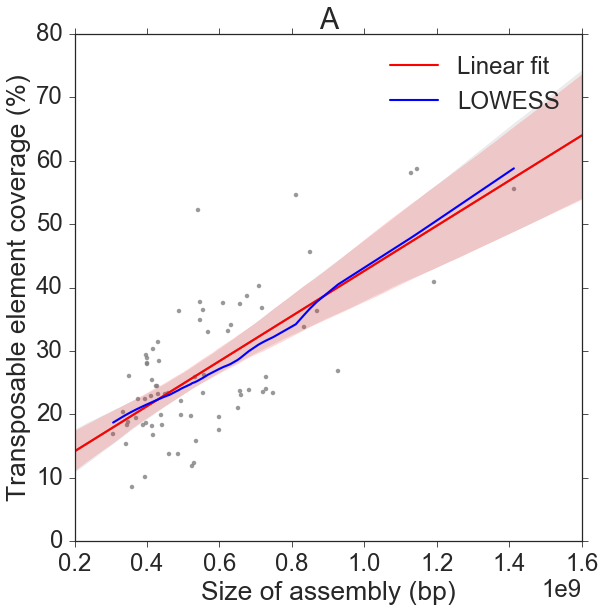

In [14]:
params = {'mathtext.default': 'sf' }          
plt.rcParams.update(params)

sns.set(context='paper', style = 'ticks', font = 'sans serif', font_scale=3)
sns.plt.figure(figsize=(20,20))

plt.xlim(xmin = 0.2)
plt.ylim(ymin = 0)

# Plotting TEs only

ax = plt.subplot(221)

plotframe = df[df['CLASS'].isin(TEs)].groupby(['SPECIES','ASSEMBLY_SIZE']).sum().reset_index()

regplot(plotframe, 'ASSEMBLY_SIZE', 'GENOME_PERC')

plt.legend()
plt.title('A')
plt.ylabel('Transposable element coverage (%)')
plt.xlabel('Size of assembly (bp)')

### As expected, there is significant correlation between the fraction of transposable elements in a genome with genome size.

## Assembly size is only a rough measure of genome size.
So, I am adding genome size estimates calculated by dividing the number of reads in an assembly with the depth across the assembly.

In [18]:
gs = pd.read_csv("../ipython_data/genomesizes.tab",
                 sep = " ")

In [19]:
gs.head()

,ALIAS,GENOMESIZE
0,fish_9,4.813319e+08
1,fish_4,5.206342e+08
2,fish_14,5.816676e+08
3,fish_12,5.572929e+08
4,fish_5,5.211168e+08


In [20]:
dfgs = pd.merge(df, gs)

In [22]:
len(set(dfgs.ALIAS)) # Including only genome assemblies with available read information for genome size estimation

65

## The estimates roughly agree.

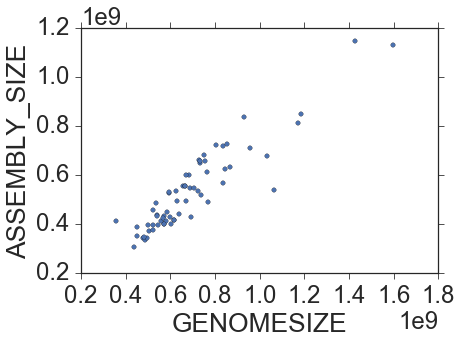

In [16]:
dfgs.groupby(['ALIAS', 'GENOMESIZE', 'ASSEMBLY_SIZE']).sum().reset_index().plot('GENOMESIZE', 'ASSEMBLY_SIZE', kind = 'scatter')

## The correlation is stronger when the (assumed to be more accurate) estimates of genome size are used. The sample size decreases from 79 to 65.

R: 0.833469570874, p-value: 7.02969777522e-18


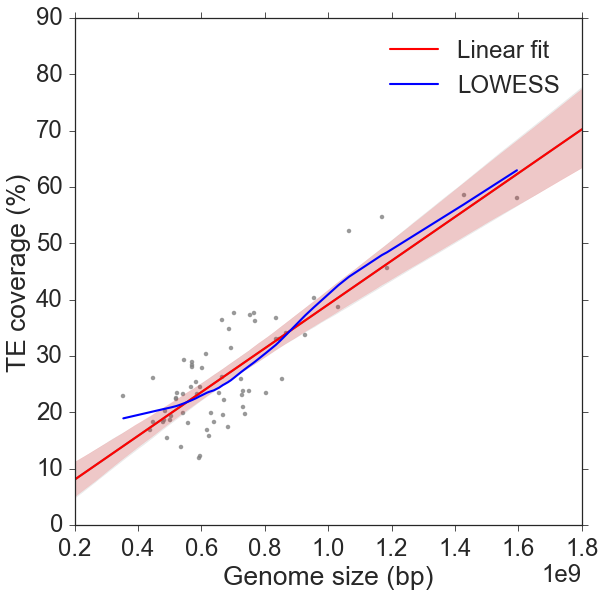

In [17]:
params = {'mathtext.default': 'sf' }          
plt.rcParams.update(params)

sns.set(context='paper', style = 'ticks', font = 'sans serif', font_scale=3)
sns.plt.figure(figsize=(20,20))

plt.xlim(xmin = 0.2)
plt.ylim(ymin = 0)

# Plotting TEs only

ax = plt.subplot(221)

plotframe = dfgs[dfgs['CLASS'].isin(TEs)].groupby(['SPECIES','GENOMESIZE']).sum().reset_index()

regplot(plotframe, 'GENOMESIZE', 'GENOME_PERC')

plt.legend()
plt.title('')
plt.ylabel('TE coverage (%)')
plt.xlabel('Genome size (bp)')

sns.plt.savefig('../../../Desktop/TEcoverage.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Do all classes contribute to genome size?

R: 0.592053502886, p-value: 2.05224281371e-07
R: 0.16569648617, p-value: 0.187133488346
R: 0.487235945445, p-value: 3.85321066778e-05
R: 0.482480530222, p-value: 4.70003395156e-05


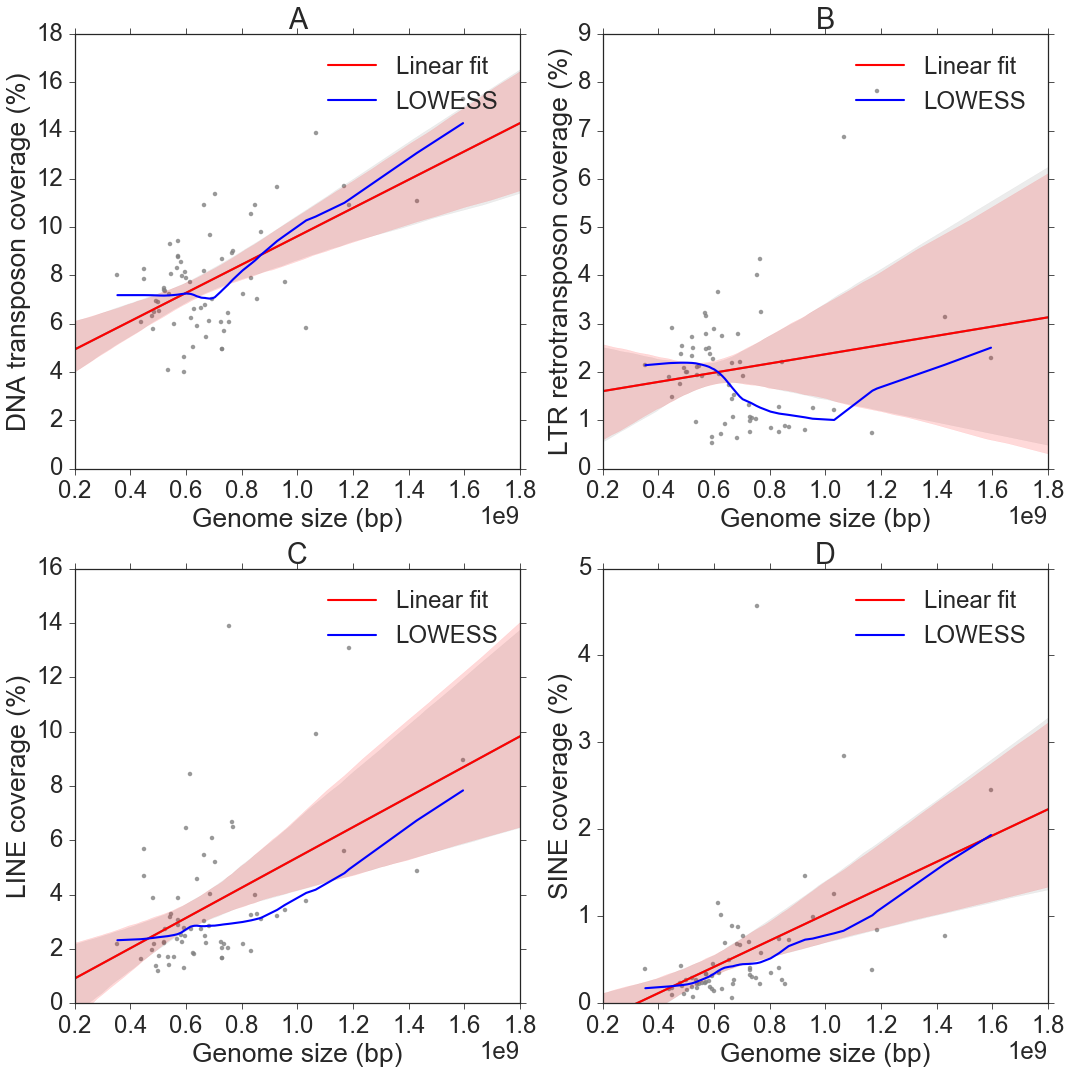

In [20]:
params = {'mathtext.default': 'sf' }          
plt.rcParams.update(params)

sns.set(context='paper', style = 'ticks', font = 'sans serif', font_scale=3)
sns.plt.figure(figsize=(15,15))

plt.xlim(xmin = 0.2)


# DNA transposons

ax = plt.subplot(221)

plotframe = dfgs[dfgs['CLASS']=='DNA'].groupby(['CLASS','SPECIES','GENOMESIZE']).sum().reset_index()

regplot(plotframe, 'GENOMESIZE', 'GENOME_PERC')

plt.legend()
plt.title('A')
plt.ylabel('DNA transposon coverage (%)')
plt.xlabel('Genome size (bp)')
plt.ylim(ymin = 0)

# LTR retrotransposons

ax = plt.subplot(222)

plotframe = dfgs[dfgs['CLASS']=='LTR'].groupby(['CLASS','SPECIES','GENOMESIZE']).sum().reset_index()

regplot(plotframe, 'GENOMESIZE', 'GENOME_PERC')


plt.title('B')
plt.ylabel('LTR retrotransposon coverage (%)')
plt.xlabel('Genome size (bp)')
plt.ylim(ymin = 0)

# LINEs

ax = plt.subplot(223)

plotframe = dfgs[dfgs['CLASS']=='LINE'].groupby(['CLASS','SPECIES','GENOMESIZE']).sum().reset_index()

regplot(plotframe, 'GENOMESIZE', 'GENOME_PERC')

plt.legend()
plt.title('C')
plt.ylabel('LINE coverage (%)')
plt.xlabel('Genome size (bp)')
plt.ylim(ymin = 0)

# SINEs

ax = plt.subplot(224)
plotframe = dfgs[dfgs['CLASS']=='SINE'].groupby(['CLASS','SPECIES','GENOMESIZE']).sum().reset_index()
regplot(plotframe, 'GENOMESIZE', 'GENOME_PERC')
plt.title('D')
plt.ylabel('SINE coverage (%)')
plt.xlabel('Genome size (bp)')
plt.ylim(ymin = 0)


sns.plt.tight_layout()
sns.plt.savefig('../../../Desktop/Classes.pdf', format='pdf', dpi=300, bbox_inches='tight')